In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print( y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

# Data preprocessing

In [5]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [6]:
# pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
# len(pad_x_train[50])

pad_x_train = pad_make(x_train)

In [7]:
# pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)
# len(pad_x_test[50])

pad_x_test = pad_make(x_test)

In [8]:
import numpy as np

np.unique(y_train).shape, np.unique(y_train)
# unique한 y값의 개수 -> Dense 수

((46,),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

# Make model

In [9]:
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=24, input_length=500))

# Hidden Layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))

# Output Layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) 

# Gadget
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# hist = model.fit( pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128 )

hist = model.fit( pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256 )

Epoch 1/100
25/25 [==============================] - 21s 683ms/step - loss: 3.7319 - accuracy: 0.3305 - val_loss: 3.4311 - val_accuracy: 0.3532
Epoch 2/100
25/25 [==============================] - 16s 653ms/step - loss: 3.0947 - accuracy: 0.3510 - val_loss: 2.8168 - val_accuracy: 0.3532
Epoch 3/100
25/25 [==============================] - 16s 651ms/step - loss: 2.6920 - accuracy: 0.3510 - val_loss: 2.5479 - val_accuracy: 0.3532
Epoch 4/100
25/25 [==============================] - 16s 651ms/step - loss: 2.5168 - accuracy: 0.3510 - val_loss: 2.4503 - val_accuracy: 0.3532
Epoch 5/100
25/25 [==============================] - 16s 654ms/step - loss: 2.4581 - accuracy: 0.3510 - val_loss: 2.4157 - val_accuracy: 0.3532
Epoch 6/100
25/25 [==============================] - 16s 654ms/step - loss: 2.4365 - accuracy: 0.3510 - val_loss: 2.4013 - val_accuracy: 0.3532
Epoch 7/100
25/25 [==============================] - 16s 661ms/step - loss: 2.4264 - accuracy: 0.3510 - val_loss: 2.3941 - val_accuracy:

# Evaluation

In [11]:
model.evaluate(pad_x_train, y_train )

281/281 [==============================] - 16s 56ms/step - loss: 0.9555 - accuracy: 0.8023


[0.9555161595344543, 0.8022711873054504]

In [12]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 56ms/step - loss: 2.0227 - accuracy: 0.5980


[2.022657871246338, 0.5979518890380859]

In [13]:
import matplotlib.pyplot as plt

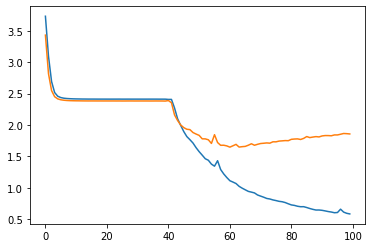

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

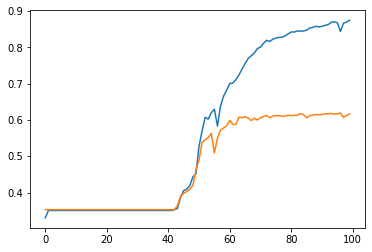

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [29]:
from sklearn.metrics import classification_report

In [32]:
y_train_pred = model.predict(pad_x_train)

In [33]:
y_train_pred[0]

array([1.1717847e-04, 2.4494540e-04, 4.4054381e-05, 9.6082956e-01,
       2.1467853e-02, 2.1755155e-05, 8.4035695e-05, 1.8764717e-04,
       3.3504486e-03, 4.6611265e-05, 4.8366048e-05, 5.6039047e-04,
       1.9031139e-04, 5.7743833e-05, 1.7255951e-04, 5.7029090e-05,
       2.8967122e-03, 1.3585994e-04, 2.6458692e-05, 2.4353536e-03,
       2.1009836e-03, 1.0846626e-04, 6.4593158e-05, 2.1815738e-05,
       2.2328313e-05, 6.0069883e-06, 1.4145520e-04, 9.8849261e-05,
       1.3816878e-04, 4.5191107e-04, 4.7240511e-04, 4.3348470e-04,
       7.8631427e-05, 1.8376135e-04, 9.9457696e-04, 2.4150022e-04,
       4.0037517e-05, 5.9221242e-05, 2.0504733e-04, 4.6540931e-04,
       4.8182861e-05, 2.9204227e-04, 1.3887897e-04, 8.5620690e-05,
       7.8788231e-05, 5.2902375e-05], dtype=float32)

In [34]:
import numpy as np

y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [35]:
len(y_train)

8982

In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.55      0.45        55
           1       0.68      0.81      0.74       432
           2       0.60      0.65      0.62        74
           3       0.94      0.96      0.95      3159
           4       0.90      0.92      0.91      1949
           5       0.00      0.00      0.00        17
           6       0.23      0.75      0.35        48
           7       0.00      0.00      0.00        16
           8       0.73      0.68      0.70       139
           9       0.45      0.66      0.53       101
          10       0.72      0.69      0.71       124
          11       0.80      0.76      0.78       390
          12       0.75      0.37      0.49        49
          13       0.83      0.40      0.54       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.66      0.73      0.70       444
          17       0.70    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
y_test_pred = model.predict(pad_x_test)

In [38]:
y_pred = np.argmax(y_test_pred, axis=1)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.08      0.06        12
           1       0.39      0.47      0.42       105
           2       0.03      0.05      0.04        20
           3       0.89      0.92      0.90       813
           4       0.79      0.77      0.78       474
           5       0.00      0.00      0.00         5
           6       0.12      0.21      0.15        14
           7       0.00      0.00      0.00         3
           8       0.29      0.37      0.32        38
           9       0.11      0.28      0.16        25
          10       0.23      0.23      0.23        30
          11       0.22      0.24      0.23        83
          12       0.43      0.23      0.30        13
          13       0.07      0.03      0.04        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.28      0.40      0.33        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Service

문장 입력 -> 사전 기준으로 숫자로 바꿔주기 -> 배열 형태 [  , , ,  ] -> pad_sequence


In [ ]:
model.predict()